# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key= "1a096b71c2f26e4823a1fb683e35ccab"


# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
query_url

n = 600
cities = []
country_codes = []

for x in range(n):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    # Make sure that the random generated city is not already in our series
    # If it is, regenerate the lat and lng until we get one that isn't
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
    
    # Add the data to our lists
    cities.append(city.city_name)
    country_codes.append(city.country_code)
    
country_codes = [x.upper() for x in country_codes]

# Create an "extracts" object to get the temperature, humidity, cloudiness and wind speed
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query_url}{cities[x]},{country_codes[x].upper()}").json()
    
    # Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    # If 'clouds' does not exist, set it to zero.
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
    # Print each city name and query string    
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query_url}{cities[x]},{country_codes[x].upper()}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

# Configure everything into a data frame
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates,
                           "Country": country_codes
                          })

Processing record 1 | lolua
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=lolua,TV
Processing record 2 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=butaritari,KI
Processing record 3 | yunyang
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=yunyang,CN
Processing record 4 | jiddah
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=jiddah,SA
Processing record 5 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=hithadhoo,MV
Processing record 6 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=punta arenas,CL
Processing record 7 | isangel
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=

Processing record 57 | baykit
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=baykit,RU
Processing record 58 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=cape town,ZA
Processing record 59 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=saint-philippe,RE
Processing record 60 | haukipudas
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=haukipudas,FI
Processing record 61 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=hilo,US
Processing record 62 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=saskylakh,RU
Processing record 63 | margate
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e

Processing record 113 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=aklavik,CA
Processing record 114 | san cristobal
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=san cristobal,EC
Processing record 115 | romny
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=romny,RU
Processing record 116 | khislavichi
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=khislavichi,RU
Processing record 117 | quang ngai
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=quang ngai,VN
Processing record 118 | santiago
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=santiago,PH
Processing record 119 | strezhevoy
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f2

Processing record 168 | vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=vaitupu,WF
Processing record 169 | vao
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=vao,NC
Processing record 170 | glowno
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=glowno,PL
Processing record 171 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=puerto del rosario,ES
Processing record 172 | christchurch
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=christchurch,NZ
Processing record 173 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=nanortalik,GL
Processing record 174 | toora-khem
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71

Processing record 225 | muros
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=muros,ES
Processing record 226 | graaff-reinet
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=graaff-reinet,ZA
Processing record 227 | pitimbu
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=pitimbu,BR
Processing record 228 | talcahuano
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=talcahuano,CL
Processing record 229 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=saint-augustin,CA
Processing record 230 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=kruisfontein,ZA
Processing record 231 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?a

Processing record 282 | beruwala
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=beruwala,LK
Processing record 283 | ceres
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=ceres,ZA
Processing record 284 | inza
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=inza,RU
Processing record 285 | uthal
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=uthal,PK
Processing record 286 | rundu
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=rundu,NA
Processing record 287 | lima
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=lima,PE
Processing record 288 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=cabo

Processing record 337 | langarud
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=langarud,IR
Processing record 338 | ekhabi
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=ekhabi,RU
Processing record 339 | hirara
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=hirara,JP
Processing record 340 | aswan
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=aswan,EG
Processing record 341 | karaul
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=karaul,RU
Processing record 342 | asau
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=asau,TV
Processing record 343 | worthing
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=wo

Processing record 394 | durazno
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=durazno,UY
Processing record 395 | jiwani
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=jiwani,PK
Processing record 396 | ardakan
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=ardakan,IR
Processing record 397 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=saint-pierre,PM
Processing record 398 | abaza
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=abaza,RU
Processing record 399 | nansio
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=nansio,TZ
Processing record 400 | tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&uni

Processing record 450 | kindu
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=kindu,CD
Processing record 451 | sorvag
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=sorvag,FO
Processing record 452 | seoni
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=seoni,IN
Processing record 453 | corn island
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=corn island,NI
Processing record 454 | mamallapuram
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=mamallapuram,IN
Processing record 455 | hastings
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=hastings,NZ
Processing record 456 | marsh harbour
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb6

Processing record 506 | kieta
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=kieta,PG
Processing record 507 | dali
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=dali,CN
Processing record 508 | lafia
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=lafia,NG
Processing record 509 | bosaso
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=bosaso,SO
Processing record 510 | isla mujeres
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=isla mujeres,MX
Processing record 511 | san jeronimo
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=san jeronimo,MX
Processing record 512 | kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab

Processing record 563 | imbituba
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=imbituba,BR
Processing record 564 | offa
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=offa,NG
Processing record 565 | boffa
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=boffa,GN
Processing record 566 | tateyama
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=tateyama,JP
Processing record 567 | grand centre
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=grand centre,CA
Processing record 568 | vite
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&units=imperial&q=vite,IN
Processing record 569 | rock springs
http://api.openweathermap.org/data/2.5/weather?appid=1a096b71c2f26e4823a1fb683e35ccab&uni

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
weather_df = weather_df.dropna(how='any')

print(f"The data frame  has {len(weather_df['City'])} cities.")

The data frame  has 530 cities.


In [26]:
# Display the City Data Frame
weather_df.head()


,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date,Country
1,butaritari,3.07,172.79,100.0,85.65,12,11.34,1.540689e+09,KI
2,yunyang,32.84,110.81,72.0,40.92,0,3.29,1.540689e+09,CN
4,hithadhoo,-0.60,73.08,100.0,80.16,64,9.44,1.540689e+09,MV
5,punta arenas,-53.16,-70.91,57.0,50.00,75,12.75,1.540685e+09,CL
6,isangel,-19.55,169.27,100.0,76.02,0,3.85,1.540689e+09,VU


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

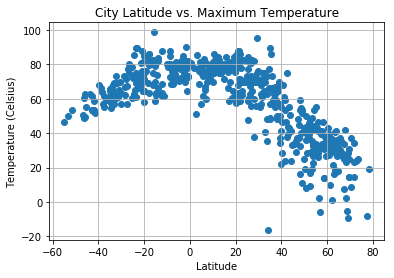

<Figure size 432x288 with 0 Axes>

In [40]:
plt.scatter(latitude, temperature, marker="o")


plt.title("City Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.grid(True)
plt.show()
plt.savefig("City_Latitude_vs_Temperature.png")

#### Latitude vs. Humidity Plot

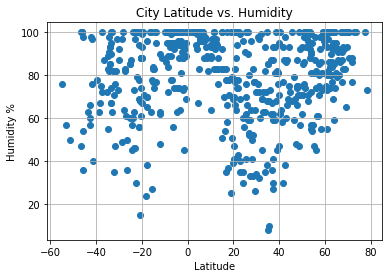

In [41]:
plt.scatter(latitude, humidity, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
plt.savefig("City_Latitude_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

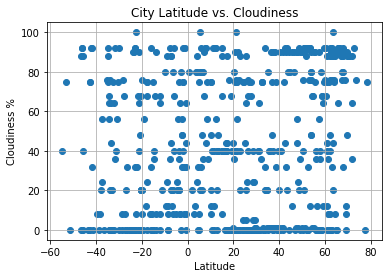

In [42]:
# Build a scatter plot for each data type
plt.scatter(latitude, cloudiness, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.savefig("City_Latitude_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

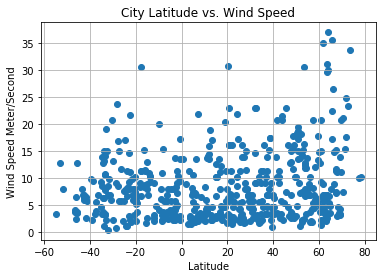

<Figure size 432x288 with 0 Axes>

In [43]:
plt.scatter(latitude, wind_speed, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed Meter/Second")
plt.grid(True)
plt.show()
plt.savefig("City_Latitude_vs_Wind_Speed.png")